## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 15
---------------------------------------

GOALS:

1. Practice making plots
2. Add trendlines to plots
3. Explore Linear Regression

----------------------------------------------------------

This homework has **4 questions** and **3 exercises**.


## Help with Algorithms!

Implementing algorithms can be very difficult. I would highly suggest that you **start by recreating the code that you see in the lecture**... copy and paste it and make sure it runs. THEN try to alter that code to do the exercises.

In [314]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

# This stops a few warning messages from showing
pd.options.mode.chained_assignment = None 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [316]:
# Load the Data
file_location = 'https://joannabieri.com/introdatascience/data/paris-paintings.csv'
DF_raw_paintings = pd.read_csv(file_location,na_filter=False)

In [317]:
show(DF_raw_paintings)

In [318]:
# Make a copy of the data that we can start working on
DF = DF_raw_paintings.copy()

# Do something about all those different NaNs
DF.replace('',np.nan,inplace=True)
DF.replace('n/a',np.nan,inplace=True)
DF.replace('NaN',np.nan,inplace=True)

**Q1** Make historgrams of the height and width of all the paintings in the data set. You should be able to recreate the plots from the lecture without looking at the code.

Don't forget to change the values into floats like we did in the lecture!

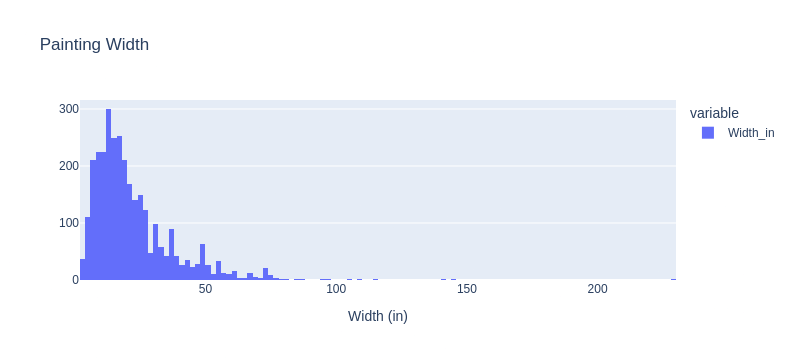

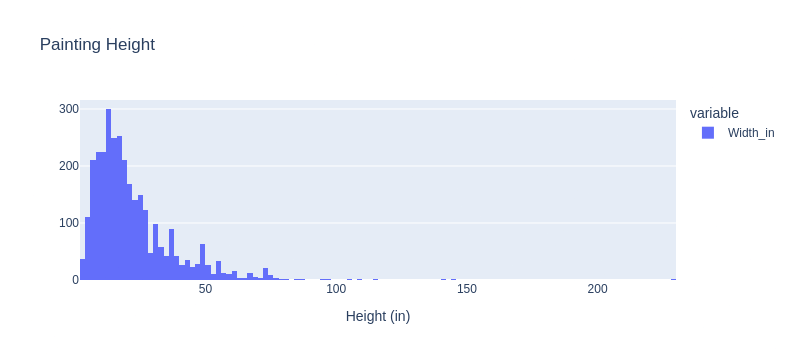

In [320]:
DF['Width_in'] = DF['Width_in'].astype('float32')
DF['Height_in'] = DF['Height_in'].astype('float32')

fig_w = px.histogram(
    DF,
    x=['Width_in'],
    title='Painting Width',
)
fig_w.update_layout(
    xaxis_title='Width (in)',
    yaxis_title=None
)

fig_h = px.histogram(
    DF,
    x=['Width_in'],
    title='Painting Height',
)
fig_h.update_layout(
    xaxis_title='Height (in)',
    yaxis_title=None
)

fig_w.show()
fig_h.show()

**Q2** Explain in words what these plots tell you about the data.

The plots show that most paintings are around 13 inches in both width and height, but that there is a good spread towards the right.


**Q3** Make a scatter plot of the width vs the height like the one in the lecture. You should be able to recreate the plots here without looking at the code.

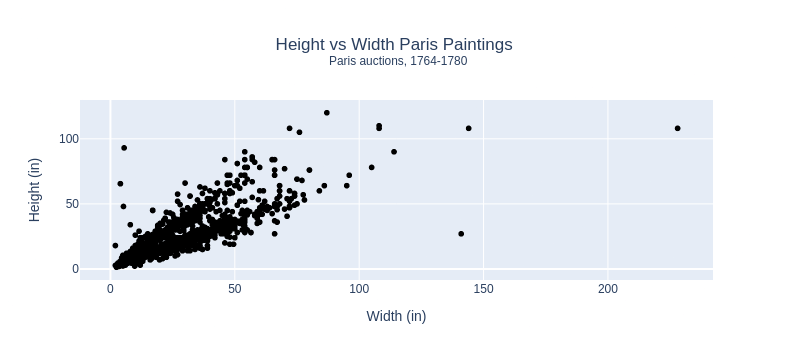

In [324]:
fig_s = px.scatter(
    DF,
    x='Width_in',
    y='Height_in',
    color_discrete_sequence=['black'],
    title='Height vs Width Paris Paintings <br><sup> Paris auctions, 1764-1780</sup>',
)

fig_s.update_layout(
    title_x=0.5,
    xaxis_title='Width (in)',
    yaxis_title='Height (in)'
)

fig_s.show()

The plot below uses Ordinary Least Squares fitting to find a reasonable line.

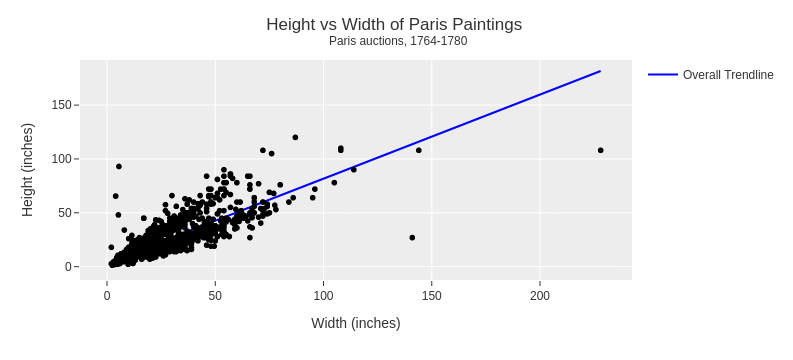

In [326]:
# Example Code Trendline

DF['Height_in'] = DF['Height_in'].apply(lambda x: float(x))
DF['Width_in'] = DF['Width_in'].apply(lambda x: float(x))

fig = px.scatter(DF,
                 x='Width_in',
                 y="Height_in",
                 color_discrete_sequence=['black'],
                trendline='ols',
                trendline_scope='overall',
                trendline_color_override='blue')


fig.update_layout(template="ggplot2",
                  title='Height vs Width of Paris Paintings <br><sup> Paris auctions, 1764-1780</sup>',
                  title_x=0.5,
                  xaxis_title="Width (inches)",
                  yaxis_title="Height (inches)")

fig.show()

So the line that "fits" this data based on the code we ran is

$$ H = 0.7808 W + 3.6214 $$

**Q4** Where do we think this prediction is most accurate? Where is there the most error? Explain why you think this?

The line  seems to be most accurate close to (0,0) where most points are still fairly clustered together in a common pattern.

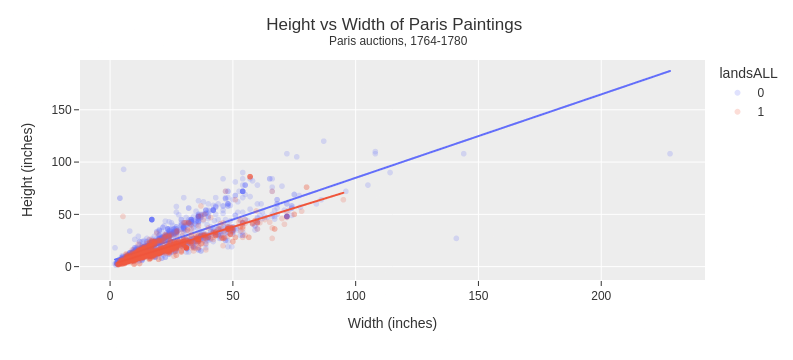

In [330]:
# Example Code Trendline with Categories
DF['landsALL'] = DF['landsALL'].apply(lambda x: str(x))

fig = px.scatter(DF,
                 x='Width_in',
                 y="Height_in",
                 color='landsALL',
                 opacity=0.2,
                 trendline='ols')

fig.update_layout(template="ggplot2",
                  title='Height vs Width of Paris Paintings <br><sup> Paris auctions, 1764-1780</sup>',
                  title_x=0.5,
                  xaxis_title="Width (inches)",
                  yaxis_title="Height (inches)")

fig.show()

IN the plot above we added another variable by coloring by whether or not there were landscape features in the painting. Then the trendline='ols' now gives us two lines. Here there is some evidence that if a painting in landscape, then it tends to be wider than it is tall.

**Exercise 1** Redo the plot above except color by some other variable that takes values of zero or one. Describe what the ols trendline tells you about the height and width of that type of painting. Eg. Does a painting being described as pastoral mean it is taller or wider than if it is not pastoral?

1. Choose a column that has just 0 and 1 as entries
2. Change those values into strings using apply and lambda
3. Do a value counts and talk about the balance in the data
4. Create a scatter plot with an old trendline colored by your focal column
5. Describe in words what you plot is telling you.

In [333]:
DF['history_wurds'] = DF['history'].map({0:'Not Historical', 1:'Historical'})
DF['singlefig_wurds'] = DF['singlefig'].map({0:'Not Single Figure', 1:'Single Figure'})
DF['arch_wurds'] = DF['arch'].map({0:'No Architecture', 1:'Architectural'})
DF['peasant_wurds'] = DF['peasant'].map({0:'No Plebs', 1:'Plebs'})

In [335]:
for col in ['history_wurds', 'singlefig_wurds', 'arch_wurds', 'peasant_wurds']:
    print(DF[col].value_counts(),'\n')

history_wurds
Not Historical    3342
Historical          51
Name: count, dtype: int64 

singlefig_wurds
Not Single Figure    2983
Single Figure         410
Name: count, dtype: int64 

arch_wurds
No Architecture    3233
Architectural       160
Name: count, dtype: int64 

peasant_wurds
No Plebs    3181
Plebs        212
Name: count, dtype: int64 



Most of these other categories are pretty lopsided. They are a bit specific.

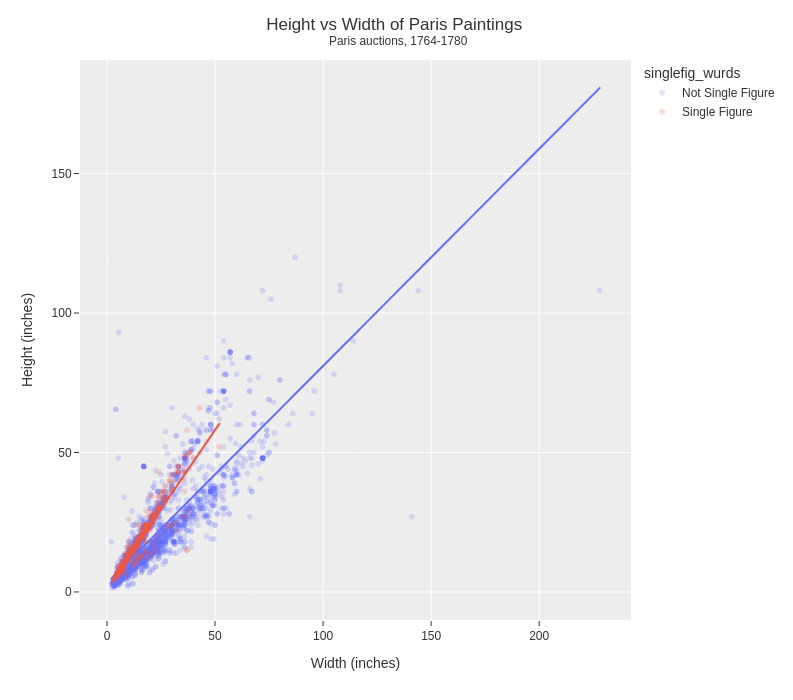

In [339]:
# Example Code Trendline with Categories
fig = px.scatter(DF,
                 x='Width_in',
                 y="Height_in",
                 color='singlefig_wurds',
                 opacity=0.2,
                 trendline='ols',
                 width=800,
                 height=700)

fig.update_layout(template="ggplot2",
                  title='Height vs Width of Paris Paintings <br><sup> Paris auctions, 1764-1780</sup>',
                  title_x=0.5,
                  xaxis_title="Width (inches)",
                  yaxis_title="Height (inches)")

fig.show()

The plot indicates that single-figure paintings are more likely than not to be taller than they are wide. This makes sense as normally people are drawn standing up.


## Install Scikit-Learn

Run the code below to install sklearn.

```{python}
    !conda install -y scikit-learn
```

In [346]:
!conda install -y scikit-learn

Channels:
 - defaults
 - conda-forge
Platform: linux-64
Solving environment: done

# All requested packages already installed.



In [347]:
# A new packages to import!
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import OneHotEncoder

**Exercise 2** Redo the Linear Regression from the lecture to see if you can use the size ('Surface') of the painting to predict the price.

1. Create a data frame with only the price and surface columns
2. Look at the data types
3. Preprocess the data - remove NaNs and change the Surface values to floats.
5. Train a linear regression model that takes as an input X = Surface Area and gives as an output y=price

           X = DF_model['Surface'].values.reshape(-1,1)
           y = DF_model['price'].values
7. Plot a scatter plot of Price vs Surface add in your predicted line
8. Find your slope and intercept
9. Look at the score

Interpret your results. Should you use a linear model to predict the price of a painting using the surface area?

*In the lecture you can see the scatter plot and score that I got.*


### Preprocessing the Data

Before you can build a model you need to do some cleaning and preprocessing of your data. Here are some important steps:

1. Select the variables that you wan to use (columns)
2. Decide what to do about NaNs or other strange data
3. (*advanced*) Think about rescaling and standardizing
4. Create the inputs and outputs (sometimes encode)
5. (*advanced*) Test - Train split

### Train the model

1. Create the base model, in this case LinearRegression()
2. Train the model using the training data
3. Look at the results.


Steps 1,2: Isolate price/surface, and show dtypes.

In [351]:
pr_sr_df = DF[['price','Surface']]
print(pr_sr_df.dtypes)

price      float64
Surface     object
dtype: object


Step 3: Preprocess. Just make float32 and remove NaNs. I don't want to convert livres to modern dollars.

In [353]:
pr_sr_df['Surface'] = pr_sr_df['Surface'].astype('float32')

#nas from both columns
na_cols = pr_sr_df['Surface'].isna() | pr_sr_df['price'].isna()
sum_snas = na_cols.sum()

pr_sr_df = pr_sr_df[~na_cols]

show(pr_sr_df)

Step 4: Train model

In [355]:
pr_sr_lr = LinearRegression()

pr_sr_lr.fit(pr_sr_df['Surface'].values.reshape(-1,1), pr_sr_df['price'])

pr_sr_lr.predict([[0]])

array([660.121521])

Step 5: Graph

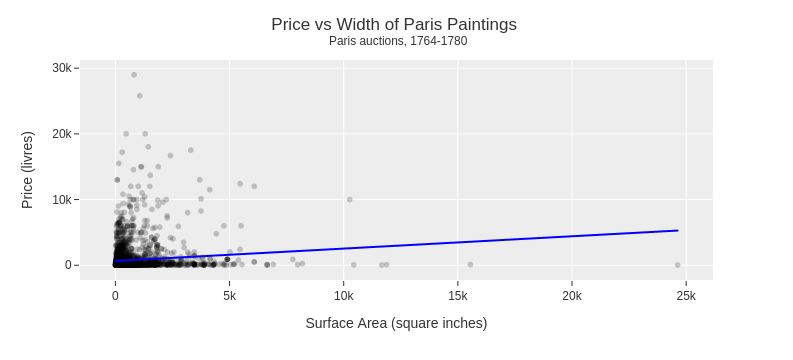

In [357]:
fig = px.scatter(pr_sr_df,
                 x='Surface',
                 y="price",
                 color_discrete_sequence=['black'],
                 opacity=0.2)

fig.update_layout(template="ggplot2",
                  title='Price vs Width of Paris Paintings <br><sup> Paris auctions, 1764-1780</sup>',
                  title_x=0.5,
                  xaxis_title="Surface Area (square inches)",
                  yaxis_title="Price (livres)")

# Add the line our model would predict
DF_model = pd.DataFrame()
DF_model['x'] = pr_sr_df['Surface']
DF_model['y'] = pr_sr_lr.coef_*DF_model['x']+pr_sr_lr.intercept_
DF_model = DF_model.sort_values('x')

fig.add_trace(
    px.line(DF_model, x='x', y='y',color_discrete_sequence=['blue']).data[0]
)

fig.show()

Step 6: Score

In [359]:
pr_sr_lr.score(pr_sr_df['Surface'].values.reshape(-1,1), pr_sr_df['price'])

0.011141075792249322

This score is terrible. The model should not be trusted.

**Exercise 3** Redo the analysis for Linear Regression with more than one categorical value (from the lecture) except this time see if the school of the painting effects the overall size ('Surface') of the painting. Don't forget to drop the NaNs where we don't know the surface size and change the surface variables to floats.

1. Create a data frame with only the school and surface columns
2. Look at the data types
3. Preprocess the data - remove NaNs and change the Surface values to floats.
5. Train a linear regression model that takes as an input X = School and gives as an output y= surface area, now you need to one hot encode the X values!

           X = DF_model['school_pntg'].values.reshape(-1,1)
           y = DF_model['Surface'].values
   
9. Look at the output, what does it mean?
        - Which school of paintings on average are largest? smallest?

*You can see the outputs of my code in the lecture*


Isolate to desired columns and show dtypes

In [363]:
my_columns = ['school_pntg','Surface']
DF_model = DF[my_columns]
DF_model.dtypes

school_pntg    object
Surface        object
dtype: object

Convert Surface values to float and remove NaNs

In [365]:
DF_model['Surface'] = DF_model['Surface'].astype('float32')
print("Percent NaN: ", DF_model['Surface'].isna().sum()/DF_model.size)

DF_model = DF_model[~DF_model['Surface'].isna()]
show(DF_model)

Percent NaN:  0.025935750073681107


Encode school_pntg

In [367]:
encoder = OneHotEncoder()
X = encoder.fit_transform(DF_model['school_pntg'].values.reshape(-1,1))

print(X[0:10])
print(encoder.categories_)

  (0, 2)	1.0
  (1, 4)	1.0
  (2, 1)	1.0
  (3, 2)	1.0
  (4, 2)	1.0
  (5, 4)	1.0
  (6, 2)	1.0
  (7, 2)	1.0
  (8, 4)	1.0
  (9, 1)	1.0
[array(['A', 'D/FL', 'F', 'G', 'I', 'S', 'X'], dtype=object)]


Do linear regression

In [375]:
lr = LinearRegression()
lr.fit(X, DF_model['Surface'])

LinearRegression()

Look at result

In [388]:
lr.coef_

array([-392.07405597, -266.70363674,  122.28787551, -393.21155602,
        142.65082463, 1051.6402297 , -264.58968112])

In [390]:
lr.intercept_

686.0740518131765

In [396]:
show(pd.DataFrame(data={'School': encoder.categories_[0], 'Surface Coef': lr.coef_}))

It seems like the Spanish liked to make very large paintings. The Austrians and Germans preferred much smaller pieces.